<a href="https://colab.research.google.com/github/lala991204/pandas/blob/master/4_5_matplotlib_line4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

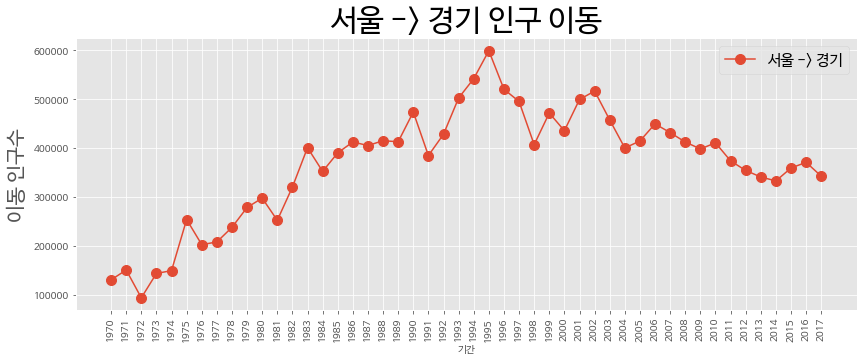

In [2]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# Excel 데이터를 데이터프레임으로 변환
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/pandas/시도별 전출입 인구수.xlsx")

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움(엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc['경기도']

# 스타일 서식 지정
plt.style.use('ggplot')

# 그림 사이즈 지정
plt.figure(figsize=(14, 5))

# x축 눈금 라벨 회전하기
plt.xticks(size=10, rotation='vertical')

# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)        # 마커 표시 추가

plt.title('서울 -> 경기 인구 이동', size=30)               # 차트 제목
plt.xlabel('기간', size=10)                                # x축 이름
plt.ylabel('이동 인구수', size=20)                         # y축 이름

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)            # 범례 표시

plt.show()     # 변경사항 저장하고 그래프 출력